In [46]:
from collections import deque
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graph_tool as gt
import graph_tool.draw as gtd
import graph_tool.search as gts

In [2]:
import random

In [3]:
from importlib import reload

In [4]:
import tpnet

In [319]:
reload(tpnet)

<module 'tpnet' from '/home/fox/0007_Science/07_transport_model/tpnet.py'>

In [5]:
names = [
    'Alpha', 'Beta', 'Callisto', 'Draco', 'Gemini',
    'Hydra', 'Lynx', 'Orion', 'Phoenix', 'Ursa'
]

In [320]:
net = tpnet.Net(len(names), names, max_random_edges=14)

In [351]:
net.spawn_car('Alpha', 1, dst='Hydra')
net.spawn_car('Lynx', 1, dst='Phoenix')
net.spawn_car('Hydra', 1)
net.spawn_car('Draco', 1)

In [234]:
rt = net.get_route('Draco', 'Beta')
for item in rt:
    print(net.vname[item])

Draco
Lynx
Alpha
Phoenix
Beta


In [333]:
net.vontrack[net.namelup['Beta']]

deque([<tpnet.Car at 0x7f23acc9d550>])

In [334]:
rt = net.vontrack[net.namelup['Beta']][0].route
for item in rt:
    print(net.vname[item])

Lynx
Gemini
Hydra


In [357]:
net.move_cars()

In [91]:
for item in net.g.get_out_neighbors(net.g.vertex(net.namelup['Gemini'])):
    print(net.vname[item])

Orion
Beta


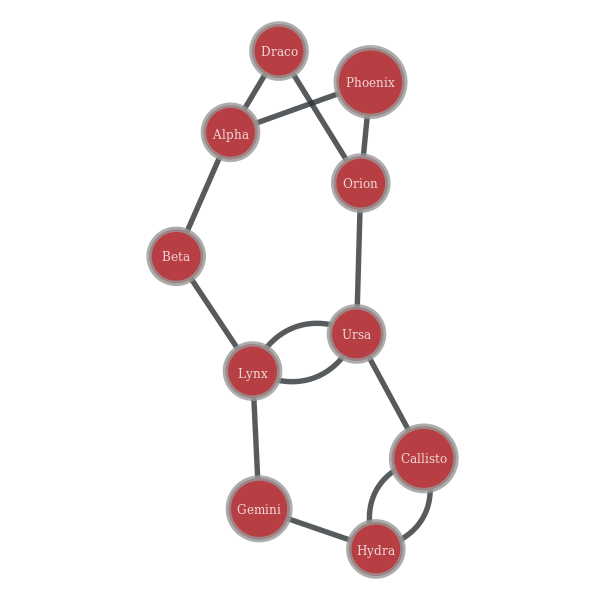

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f237e1f5c50, at 0x7f23acc9d5c0>

In [321]:
gtd.graph_draw(net.g, vertex_text=net.vname, inline=True)